In [4]:
# HOXB13 FISH quantification from Maristela's data for Dennis Sgroi
# 3/28/2023
# Esther Rheinbay


In [5]:
import sys
import pandas as pd
import numpy as np

from scipy.stats import ttest_ind, mannwhitneyu, fisher_exact
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib_venn import venn2
%matplotlib inline

figdir = '/Users/esther/Documents/Projects/2019/Sgroi_HOXB13/Manuscript/Figures/'

In [6]:
FISH_data = pd.read_excel('/Users/esther/Documents/Projects/2019/Sgroi_HOXB13/HIcks HER2 HOXB13 CEP17 FISH scoring and ER data.xlsx', header=0, sheet_name=0)

In [7]:
print(FISH_data.columns.values)
df = FISH_data[['case', 'Status', 'Her2/Cep17', 'ER']]
df.rename(columns={'Her2/Cep17': 'ratio'}, inplace=True)
df['Gene'] = 'HER2'
df2 = FISH_data[['case', 'Status', 'HoxB13/Cep17', 'ER']]
df2.rename(columns={'HoxB13/Cep17': 'ratio'}, inplace=True)
df2['Gene'] = 'HOXB13'
df = df.append(df2)



['case' 'Her2amp by Path' 'Her2/Cep17' 'HoxB13/Cep17' 'Cep17' 'HOXB13'
 'HER2' 'Cep17 mean' 'HOXB13 mean' 'HER2 mean' 'Cep17 SD' 'HOXB13 SD'
 'HER2 SD' '#' 'ER' 'PR' 'Status' 'Unnamed: 17' 'Unnamed: 18']


/var/folders/bb/yb3gg4014bv4v88wmr3c_95c0000gq/T/ipykernel_25007/1919667278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Her2/Cep17': 'ratio'}, inplace=True)
/var/folders/bb/yb3gg4014bv4v88wmr3c_95c0000gq/T/ipykernel_25007/1919667278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gene'] = 'HER2'
/var/folders/bb/yb3gg4014bv4v88wmr3c_95c0000gq/T/ipykernel_25007/1919667278.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

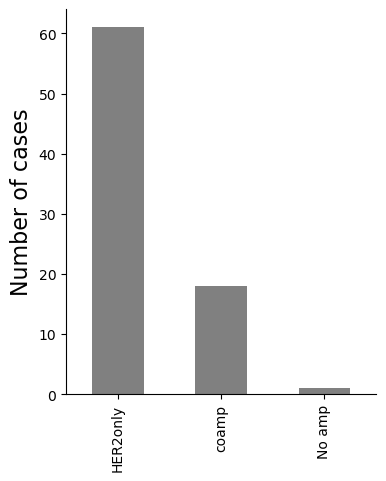

In [8]:
# Number of cases by status. Note that there are no HOXB13 only amplified cases in this cohort
fig, ax = plt.subplots(1,1, figsize = (4,5))
FISH_data.Status.value_counts().plot.bar(ax=ax, color='grey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Number of cases", fontsize=16)
plt.savefig(figdir + 'HER2_HOXB13_amp_counts.pdf')


Text(0, 0.5, 'Number of cases')

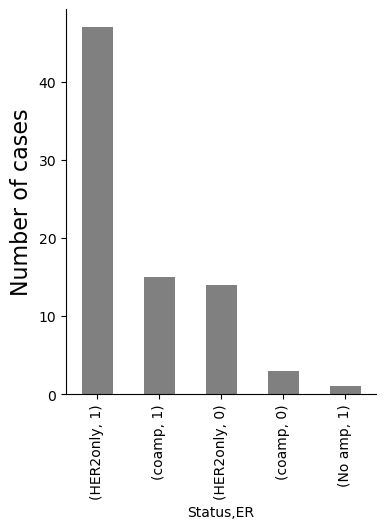

In [9]:
# Number of cases by status. Note that there are no HOXB13 only amplified cases in this cohort
fig, ax = plt.subplots(1,1, figsize = (4,5))
FISH_data[['Status', 'ER']].value_counts().plot.bar(ax=ax, color='grey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Number of cases", fontsize=16)
#plt.savefig(figdir + 'HER2_HOXB13_amp_counts.pdf')


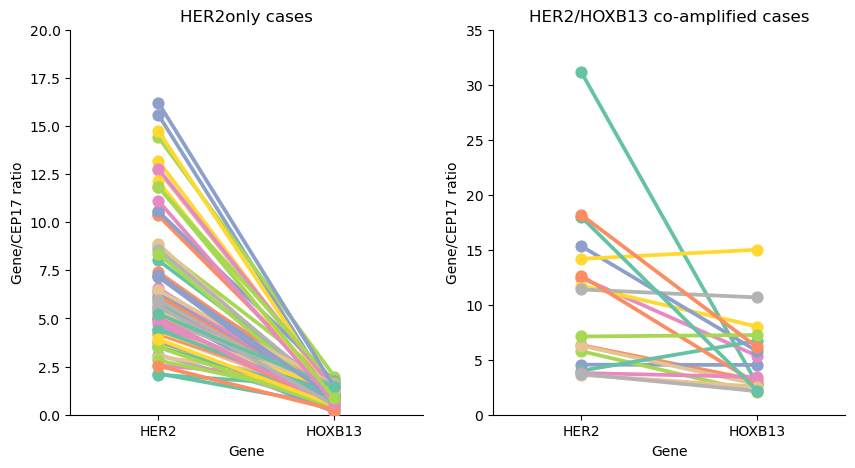

In [10]:
# Copy ratio for HER2 and HOXB13 for HER2 only cases, and co-amp cases. By definition, HOXB13 in HER2 only is <2

fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.pointplot(x = 'Gene', y = 'ratio', hue = 'case', data = df[df.Status=='HER2only'], ax=ax[0], palette = 'Set2')
ax[0].set_ylim(0,20)
#ax[0].hlines(2, 0,1, color = 'lightblue')
ax[0].get_legend().remove()
sns.despine()
ax[0].set_ylabel('Gene/CEP17 ratio')
ax[0].set_title('HER2only cases')
sns.pointplot(x = 'Gene', y = 'ratio', hue = 'case', data = df[df.Status=='coamp'], ax=ax[1], palette='Set2')
ax[1].set_ylim(0,35)
sns.despine()
#ax[1].hlines(2, 0,1, color = 'lightblue')
ax[1].get_legend().remove()

ax[1].set_ylabel('Gene/CEP17 ratio')
ax[1].set_title('HER2/HOXB13 co-amplified cases')
plt.savefig(figdir + 'HER2_HOXB13_amp_lines.pdf')

In [33]:
# % of co-amp in FISH cohort
df['HER2_class'] = df.apply(lambda x: 'co-amp' if (x.Status =='coamp') and (x.ratio > 4) else ('cogain' if (x.Status =='coamp') & (x.ratio<4) else x.Status), axis=1)
df.HER2_class.value_counts()

HER2only    122
co-amp       23
cogain       12
No amp        2
coamp         1
Name: HER2_class, dtype: int64

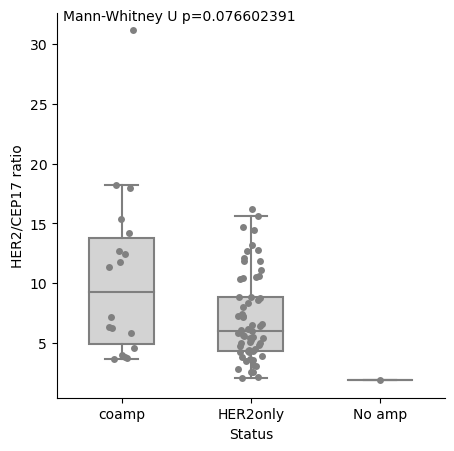

In [11]:
# comparison of HER2 copy ratio for HER2 only and co-amp tumors; marginally higher copy ratios for co-amp cases. 

fig, ax = plt.subplots(1,1, figsize = (5,5))
sns.boxplot(x = 'Status', y = 'ratio', data = df[df.Gene=='HER2'], width=0.5, color='lightgrey', fliersize = 0)
sns.stripplot(x = 'Status', y = 'ratio', data = df[df.Gene=='HER2'], color = 'grey')
ax.set_ylabel('HER2/CEP17 ratio')
#ax[0].hlines(2, 0,1, color = 'lightblue')
ax.text(x=-0.45, y=32, s='Mann-Whitney U p=' + str(round(mannwhitneyu(df[(df.Gene=='HER2') & (df.Status=='HER2only')].ratio.dropna(), df[(df.Gene=='HER2') & (df.Status=='coamp')].ratio.dropna()).pvalue,9)))
sns.despine()    
plt.savefig(figdir + 'HER2_over_CEP17_ratio_by_status.pdf')

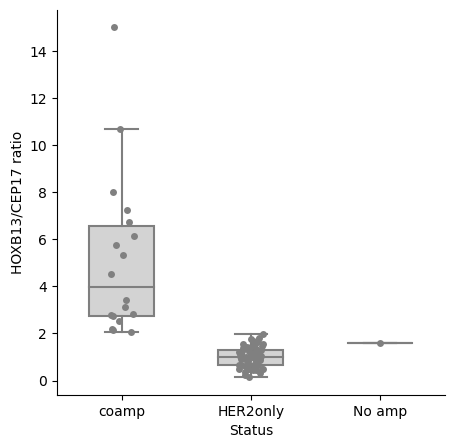

In [12]:
# same as above, for HOXB13. By definition, HOXB13 in HER2 only is <2 and co-amp is >2. 
fig, ax = plt.subplots(1,1, figsize = (5,5))
sns.boxplot(x = 'Status', y = 'ratio', data = df[df.Gene=='HOXB13'], width=0.5, color='lightgrey', fliersize = 0)
sns.stripplot(x = 'Status', y = 'ratio', data = df[df.Gene=='HOXB13'], color = 'grey')
ax.set_ylabel('HOXB13/CEP17 ratio')
sns.despine()    
#plt.savefig(figdir + 'HOXB13_over_CEP17_ratio_by_status.pdf')

In [24]:
# Stratify by ER
print(df[['Status', 'ER']].value_counts().unstack())

print(fisher_exact(df[['Status', 'ER']].value_counts().unstack().loc[['HER2only', 'coamp']]))

ER           0     1
Status              
HER2only  28.0  94.0
No amp     NaN   2.0
coamp      6.0  30.0
SignificanceResult(statistic=1.4893617021276595, pvalue=0.49539196618296144)


In [28]:
# percentage of coamp by ER status
print((df[['Status', 'ER']].value_counts()/df[['ER']].value_counts()).unstack()*100)

Status   HER2only    No amp      coamp
ER                                    
0       82.352941       NaN  17.647059
1       74.603175  1.587302  23.809524


In [14]:
# Fisher test for co-amp frequency in ER+ vs ER- HER-gained breast cancers from TCGA. Numbers from Irene's analysis, Figure 2. 
#in the ER+ (186/236, 79%) than ER- (38/74, 51%)  

# 186 ER+/HOXB13 amp
# 50 ER+/HOXB13 non-amp
# 38 ER-/HOXB13 amp
# 36ER-/HOXB13 non-amp
fisher_exact([[186,50],[38,36]])

SignificanceResult(statistic=3.5242105263157897, pvalue=1.10838148789369e-05)

In [15]:
print(fisher_exact(FISH_data[['Status','ER']].value_counts()[['HER2only', 'coamp']].unstack()))

print('ER+:', 15/(15+47))
print('ER-:', 3/(3+14))

FISH_data[['Status','ER']].value_counts()[['HER2only', 'coamp']].unstack()




SignificanceResult(statistic=1.4893617021276595, pvalue=0.7486006445217264)
ER+: 0.24193548387096775
ER-: 0.17647058823529413


ER,0,1
Status,,
HER2only,14,47
coamp,3,15


In [16]:
# Venn diagrams for Irene's TCGA counts (Figure 1)
#ER+
# HER2 gain: 236 ; HOXB13 gain: 238; both: 186
venn2(subsets = (236-186, 238-186, 186), set_labels = ('HER2', 'HOXB13'), set_colors=('orange', 'skyblue'), alpha = 0.7)
plt.savefig(figdir + 'ERpos_HER2_HOXB13_Venn.pdf')
plt.show()
#ER-
# HER2 gain: 74 ; HOXB13 gain: 52; both: 38
venn2(subsets = (74-38, 52-38, 38), set_labels = ('HER2', 'HOXB13'), set_colors=('orange', 'skyblue'), alpha = 0.7)
plt.savefig(figdir + 'ERneg_HER2_HOXB13_Venn.pdf')

NameError: name 'venn2' is not defined